In [60]:
!pip install pandas seaborn

  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/83/11/00d3c3dfc25ad54e731d91449895a79e4bf2384dc3ac01809010ba88f6d5/seaborn-0.13.2-py3-none-any.whl.metadata
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Obtaining dependency information for matplotlib!=3.6.1,>=3.4 from https://files.pythonhosted.org/packages/36/11/62250ea25780d4b59c2c6044ec161235c47cc05a18d0ec0a05657de75b7d/matplotlib-3.8.4-cp311-cp311-macosx_10_12_x86_64.whl.metadata
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/33/0e/51ff72fac17e2500baf30b6b2a24be423a8d27e1625e5de99f585b852d74/contourpy-1.2.1-cp311-cp311-macosx_10_9_x86_64.whl.metadata
  Obtaining dependency information for cycler>=0.10 from https://files.pythonhosted.org/packages/e7/05/c19819d5e3d95294a6f5947fb9b9629efb316b96de511b418c53d245aae6/cycler-0.12.1-py3-none-any.whl.metadata
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  

In [3]:
import pandas as pd

In [32]:
df = pd.read_csv("desktop_ui_evaluation.csv").drop(columns=['Image number'])

In [63]:
(~(df == 'x')).sum().sort_values()

git-base-coco        8
lblip-large         26
git-large-coco      26
blip-large          28
git-large           29
lblip-base          30
pix2struct-large    32
pix2struct-base     33
dtype: int64

In [36]:
(df.replace('x', 100).astype(int) <= 5).sum().sort_values()

git-base-coco        8
git-large-coco      25
lblip-large         26
blip-large          27
git-large           28
lblip-base          28
pix2struct-large    29
pix2struct-base     30
dtype: int64

In [37]:
(df.replace('x', 100).astype(int) <= 4).sum().sort_values()

git-base-coco        7
lblip-base          21
git-large-coco      23
lblip-large         24
blip-large          25
git-large           26
pix2struct-large    26
pix2struct-base     28
dtype: int64

In [38]:
(df.replace('x', 100).astype(int) <= 3).sum().sort_values()

git-base-coco        4
lblip-base          17
lblip-large         19
pix2struct-large    19
git-large-coco      19
git-large           20
blip-large          23
pix2struct-base     26
dtype: int64

In [39]:
(df.replace('x', 100).astype(int) <= 2).sum().sort_values()

git-base-coco        3
lblip-base          11
git-large-coco      13
lblip-large         15
git-large           18
blip-large          18
pix2struct-large    18
pix2struct-base     24
dtype: int64

In [40]:
(df.replace('x', 100).astype(int) <= 1).sum().sort_values()

git-base-coco        0
git-large-coco       8
blip-large           9
lblip-base           9
lblip-large         10
pix2struct-large    11
git-large           14
pix2struct-base     17
dtype: int64

In [55]:
(df.replace('x', 100).astype(int) <= 1).sum().sort_values().to_frame().rename(columns={0: 1})

,1
git-base-coco,0
git-large-coco,8
blip-large,9
lblip-base,9
lblip-large,10
pix2struct-large,11
git-large,14
pix2struct-base,17


In [58]:
wdf = pd.concat([(df.replace('x', 100).astype(int) <= i).sum().sort_values().to_frame().rename(columns={0: i}) for i in range(5,0,-1)],axis=1)
wdf

,5,4,3,2,1
git-base-coco,8,7,4,3,0
git-large-coco,25,23,19,13,8
lblip-large,26,24,19,15,10
blip-large,27,25,23,18,9
git-large,28,26,20,18,14
lblip-base,28,21,17,11,9
pix2struct-large,29,26,19,18,11
pix2struct-base,30,28,26,24,17


<Axes: >

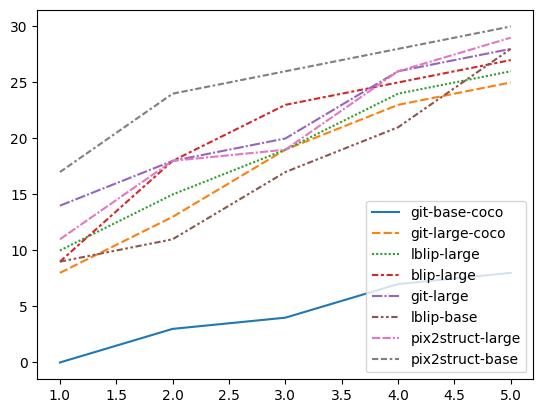

In [78]:
import seaborn as sns

sns.lineplot(wdf.T)

In [72]:
nopx = df[df['pix2struct-base']=='x'].drop(columns=['pix2struct-base'])
nopx

,git-large,blip-large,lblip-base,lblip-large,pix2struct-large,git-base-coco,git-large-coco
3,4,2,1,2,6,x,4
8,x,1,3,4,x,x,2
9,4,2,2,x,1,x,4
11,2,3,1,x,x,x,4
12,x,x,1,x,x,2,x
14,4,1,x,x,2,3,x
15,x,2,1,2,4,x,5
20,1,x,3,x,4,x,1
25,1,1,x,x,4,x,1
28,x,x,x,x,x,x,x


In [73]:
wdpx = pd.concat([(nopx.replace('x', 100).astype(int) <= i).sum().sort_values().to_frame().rename(columns={0: i}) for i in range(5,0,-1)],axis=1)
wdpx

,5,4,3,2,1
git-base-coco,2,2,2,1,0
lblip-large,5,5,4,4,2
git-large,8,8,5,5,4
pix2struct-large,8,8,3,3,2
git-large-coco,9,8,5,4,3
lblip-base,10,9,9,7,6
blip-large,11,11,11,10,5


<Axes: >

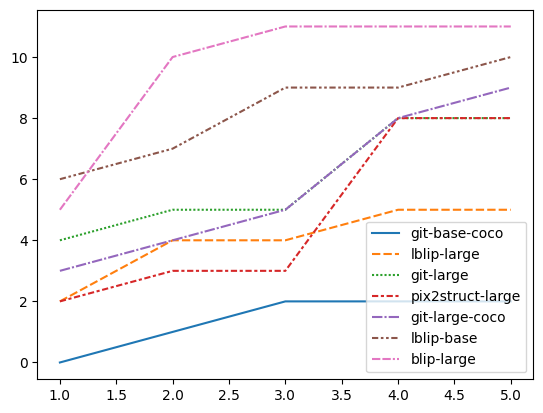

In [74]:
sns.lineplot(wdpx.T)

In [77]:
(~(nopx == 'x')).sum().sort_values()

git-base-coco        2
lblip-large          5
git-large            8
pix2struct-large     9
git-large-coco       9
lblip-base          10
blip-large          11
dtype: int64